### 中文乱码

In [2]:
import numpy as np
import pandas as pd

df = pd.read_excel('./分数汇总.xlsx')
df.head()

,性别,姓名,男1000米跑,男1000米跑分数,男50米跑,男50米跑分数,男跳远,男跳远分数,男体前屈,男体前屈分数,男引体,男引体分数,男肺活量,男肺活量分数
0,男,郭*森18,5.19,40,9.55,50,210,66,15,80,6,50,7042,100
1,男,苏*飞27,4.12,72,8.60,68,215,70,15,80,11,76,3458,74
2,男,寻*潇13,4.17,70,8.16,72,215,70,14,78,4,30,4336,90
3,男,郭*冉36,4.19,70,8.96,64,205,64,14,78,0,0,4539,95
4,男,王*磊40,0.00,0,8.30,72,230,76,14,78,9,68,6059,100


In [5]:
# 保存时，指定了中文编码
df.to_excel('./分数汇总2.xlsx',encoding='gbk')

df.to_excel('./分数汇总3.xlsx',encoding='utf8')

In [7]:
df.to_csv('./分数汇总.csv',encoding='utf-8')

### 数据转换

#### apply、applymap应用

In [8]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data = np.random.randint(0,10,size = (10,3)),
                  index = list('ABCDEFHIJK'),
                  columns=['Python','Tensorflow','Keras'])
df

,Python,Tensorflow,Keras
A,7,2,6
B,0,7,5
C,5,1,1
D,3,5,8
E,9,6,0
F,1,8,8
H,6,6,9
I,2,8,1
J,9,2,7
K,2,8,7


map和apply可以对Series进行数据修改

$\lambda$

In [10]:
# apply应用，方法：自定义、简单隐式函数（lambda）
df['Python'] = df['Python'].apply(lambda x : x + 100)
df

,Python,Tensorflow,Keras
A,107,2,6
B,100,7,5
C,105,1,1
D,103,5,8
E,109,6,0
F,101,8,8
H,106,6,9
I,102,8,1
J,109,2,7
K,102,8,7


In [11]:
df['Python'] = df['Python'].map(lambda x : x - 100)
df

,Python,Tensorflow,Keras
A,7,2,6
B,0,7,5
C,5,1,1
D,3,5,8
E,9,6,0
F,1,8,8
H,6,6,9
I,2,8,1
J,9,2,7
K,2,8,7


applymap它可以对整个DataFrame进行全部处理

In [15]:
def convert(x):
    if x < 5:
        return 100
    else:
        return -100
df.applymap(convert)

,Python,Tensorflow,Keras
A,-100,100,-100
B,100,-100,-100
C,-100,100,100
D,100,-100,-100
E,-100,-100,100
F,100,-100,-100
H,-100,-100,-100
I,100,-100,100
J,-100,100,-100
K,100,-100,-100


#### transform变形、数据转换

In [16]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data = np.random.randint(0,10,size = (10,3)),
                  index = list('ABCDEFHIJK'),
                  columns=['Python','Tensorflow','Keras'])
df.iloc[4,2] = None # 空数据
df

,Python,Tensorflow,Keras
A,0,6,5.0
B,1,3,5.0
C,9,0,4.0
D,9,1,9.0
E,1,2,NaN
F,2,9,5.0
H,1,2,6.0
I,1,0,7.0
J,8,2,4.0
K,8,2,6.0


In [17]:
df['Python'].transform(lambda x : x+10)

A    10
B    11
C    19
D    19
E    11
F    12
H    11
I    11
J    18
K    18
Name: Python, dtype: int64

In [18]:
df['Python'].transform(convert)

A    100
B    100
C   -100
D   -100
E    100
F    100
H    100
I    100
J   -100
K   -100
Name: Python, dtype: int64

对一列，进行不同的操作

In [23]:
df['Python'].transform([np.sqrt,np.exp,convert])# 开平发，幂运算自然底数e

,sqrt,exp,convert
A,0.000000,1.000000,100
B,1.000000,2.718282,100
C,3.000000,8103.083928,-100
D,3.000000,8103.083928,-100
E,1.000000,2.718282,100
F,1.414214,7.389056,100
H,1.000000,2.718282,100
I,1.000000,2.718282,100
J,2.828427,2980.957987,-100
K,2.828427,2980.957987,-100


对多列，进行不同的操作

In [25]:
df.transform({'Python':np.exp,'Tensorflow':lambda x:x+10,'Keras':np.sqrt})

,Python,Tensorflow,Keras
A,1.000000,16,2.236068
B,2.718282,13,2.236068
C,8103.083928,10,2.000000
D,8103.083928,11,3.000000
E,2.718282,12,NaN
F,7.389056,19,2.236068
H,2.718282,12,2.449490
I,2.718282,10,2.645751
J,2980.957987,12,2.000000
K,2980.957987,12,2.449490


In [26]:
df.apply({'Python':np.exp,'Tensorflow':lambda x:x+10,'Keras':np.sqrt})

,Python,Tensorflow,Keras
A,1.000000,16,2.236068
B,2.718282,13,2.236068
C,8103.083928,10,2.000000
D,8103.083928,11,3.000000
E,2.718282,12,NaN
F,7.389056,19,2.236068
H,2.718282,12,2.449490
I,2.718282,10,2.645751
J,2980.957987,12,2.000000
K,2980.957987,12,2.449490


#### 重排随机抽样哑变量

In [27]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data = np.random.randint(0,10,size = (10,3)),
                  index = list('ABCDEFHIJK'),
                  columns=['Python','Tensorflow','Keras'])
df

,Python,Tensorflow,Keras
A,7,0,4
B,7,9,0
C,6,5,5
D,0,1,8
E,5,1,8
F,2,2,2
H,4,0,5
I,7,4,6
J,2,7,6
K,6,9,6


In [29]:
index = np.random.permutation(10)

# 重排
df.take(index)

,Python,Tensorflow,Keras
D,0,1,8
F,2,2,2
J,2,7,6
A,7,0,4
B,7,9,0
H,4,0,5
K,6,9,6
E,5,1,8
I,7,4,6
C,6,5,5


In [30]:
# 随机抽样
index = np.random.randint(0,10,size = 5)
df.take(index)

,Python,Tensorflow,Keras
A,7,0,4
C,6,5,5
I,7,4,6
C,6,5,5
I,7,4,6


In [32]:
# 哑变量，独热编码，1表示有，0表示没有
df = pd.DataFrame({'key':['b','b','a','c','a','b']}) # 不是数字了，字符串
df

,key
0,b
1,b
2,a
3,c
4,a
5,b


In [33]:
pd.get_dummies(df,prefix='',prefix_sep='') # 哑变量，独热编码

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


### 数据重塑

In [1]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data = np.random.randint(0,100,size = (10,3)),
                  index = list('ABCDEFHIJK'),
                  columns=['Python','Tensorflow','Keras'])
display(df)
df.T # 转置

,Python,Tensorflow,Keras
A,29,76,26
B,99,66,93
C,31,87,1
D,8,87,27
E,23,84,58
F,17,57,81
H,20,88,68
I,81,81,64
J,8,53,69
K,49,44,9


,A,B,C,D,E,F,H,I,J,K
Python,29,99,31,8,23,17,20,81,8,49
Tensorflow,76,66,87,87,84,57,88,81,53,44
Keras,26,93,1,27,58,81,68,64,69,9


#### 多层索引

In [2]:
df2 = pd.DataFrame(data = np.random.randint(0,100,size = (20,3)),
                   index = pd.MultiIndex.from_product([list('ABCDEFHIJK'),['期中','期末']]),#多层索引
                   columns=['Python','Tensorflow','Keras'])
df2

Python  Tensorflow  Keras
A 期中      60          19      8
  期末      19          15     13
B 期中      85          92     60
  期末      68          22     58
C 期中      34          43     89
  期末      83          79     12
D 期中      21          17     67
  期末      36          64     23
E 期中       8          38     79
  期末      45          78     74
F 期中      79          46     23
  期末      72          18     87
H 期中      59          74     48
  期末      10          44     99
I 期中      25           9     17
  期末       6          76      2
J 期中      93          61     18
  期末      89          26     41
K 期中      13          57     18
  期末      63          88     98

In [3]:
df3 = pd.DataFrame(data = np.random.randint(0,100,size = (10,6)),
                   index = list('ABCDEFHIJK'),
                   columns=pd.MultiIndex.from_product([['Python','Math','En'],['期中','期末']]))
df3

Python     Math      En    
      期中  期末   期中  期末  期中  期末
A     66  16   99  75  57  29
B     18   7   85  16  53  74
C     81  89    9  92  72  95
D      6  65   40  20  87  47
E     89  10   70  17  45  52
F     13  52   57  24  36  74
H     87  97   18  95   0  12
I     35   1   49  59  88  21
J     35  23   23  35  74  76
K     48  94   62   6  64  95

In [8]:
# 行索引变成列索引，结构改变
# 默认情况下，最里层调整
# level = -1调整参数，可以改变行变列的顺序
df2.unstack(level = -1)

Python     Tensorflow     Keras    
      期中  期末         期中  期末    期中  期末
A     60  19         19  15     8  13
B     85  68         92  22    60  58
C     34  83         43  79    89  12
D     21  36         17  64    67  23
E      8  45         38  78    79  74
F     79  72         46  18    23  87
H     59  10         74  44    48  99
I     25   6          9  76    17   2
J     93  89         61  26    18  41
K     13  63         57  88    18  98

In [12]:
# stack堆，摞起来，一行行摞起来
# 作用：列索引变成行索引
df3.stack(level = 1)

En  Math  Python
A 期中  57    99      66
  期末  29    75      16
B 期中  53    85      18
  期末  74    16       7
C 期中  72     9      81
  期末  95    92      89
D 期中  87    40       6
  期末  47    20      65
E 期中  45    70      89
  期末  52    17      10
F 期中  36    57      13
  期末  74    24      52
H 期中   0    18      87
  期末  12    95      97
I 期中  88    49      35
  期末  21    59       1
J 期中  74    23      35
  期末  76    35      23
K 期中  64    62      48
  期末  95     6      94

多层索引运算

In [16]:
# 期中、期末消失
# 每个人，期中期末总分数
df2.sum(level = 0)

,Python,Tensorflow,Keras
A,79,34,21
B,153,114,118
C,117,122,101
D,57,81,90
E,53,116,153
F,151,64,110
H,69,118,147
I,31,85,19
J,182,87,59
K,76,145,116


In [19]:
# 同学索引消失
# 所有同学，期中、期末平均分
df2.mean(level = 1)

,Python,Tensorflow,Keras
期中,47.7,45.6,42.7
期末,49.1,51.0,50.7


In [22]:
# df3是多层列索引，可以直接使用[],根据层级关系取数据
df3['Python','期中']['A']

66

In [25]:
# df2不是多层列索引，不能直接使用[],根据层级关系取数据
df2['Python','期中']

KeyError: ('Python', '期中')

### 数学和统计方法

#### 简单统计指标

In [28]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data = np.random.randint(0,100,size = (20,3)),
                  index = list('ABCDEFHIJKLMNOPQRSTU'),
                  columns=['Python','Tensorflow','Keras'])

def convert(x):
    if x > 80:
        return np.NaN
    else:
        return x
df['Python'] = df['Python'].map(convert)

df['Tensorflow'] = df['Tensorflow'].apply(convert)

df['Keras'] = df['Keras'].transform(convert)
df

,Python,Tensorflow,Keras
A,74.0,49.0,75.0
B,66.0,46.0,17.0
C,78.0,48.0,NaN
D,76.0,74.0,33.0
E,NaN,16.0,8.0
F,65.0,20.0,67.0
H,NaN,29.0,71.0
I,7.0,NaN,6.0
J,NaN,59.0,41.0
K,NaN,10.0,76.0


In [30]:
df.count() # 统计非空数据的个数

Python        14
Tensorflow    18
Keras         16
dtype: int64

In [31]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data = np.random.randint(0,100,size = (20,3)),
                  index = list('ABCDEFHIJKLMNOPQRSTU'),
                  columns=['Python','Tensorflow','Keras'])
df

,Python,Tensorflow,Keras
A,71,42,74
B,30,23,57
C,47,62,97
D,52,90,34
E,54,9,96
F,48,71,13
H,93,64,6
I,72,83,13
J,43,16,61
K,35,48,18


In [32]:
df.median() # 中位数

Python        45.0
Tensorflow    49.5
Keras         34.5
dtype: float64

In [36]:
df.max()

Python        93
Tensorflow    92
Keras         97
dtype: int32

In [38]:
df.quantile(q = [0.25,0.5,0.75])

,Python,Tensorflow,Keras
0.25,29.75,25.25,16.75
0.50,45.00,49.50,34.50
0.75,62.25,71.50,68.00


#### 索引标签、位置获取(最大值、最小值)

In [44]:
# 2、索引位置
df['Tensorflow'].argmin() # 计算最小值位置,自然数0、1、2……
df['Keras'].argmax() # 最大值位置
df.idxmax() # 最大值索引标签：index强标记
# df.idxmin() # 最小值索引标签

Python        H
Tensorflow    T
Keras         C
dtype: object

In [45]:
df['Python'].loc['H']

93

In [47]:
df['Keras'].loc['C']

97

In [46]:
df.max()

Python        93
Tensorflow    92
Keras         97
dtype: int32

#### 更多统计指标

In [49]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data = np.random.randint(0,5,size = (20,3)),
                  index = list('ABCDEFHIJKLMNOPQRSTU'),
                  columns=['Python','Tensorflow','Keras'])
df

,Python,Tensorflow,Keras
A,2,3,3
B,1,2,1
C,3,2,4
D,2,0,1
E,4,0,3
F,2,3,2
H,2,2,3
I,4,1,3
J,2,3,4
K,3,4,2


In [52]:
df['Python'].value_counts() # 统计元素出现次数
df['Python'].unique() # 去重

array([2, 1, 3, 4])

In [53]:
df.cummin() # 累计最小值

,Python,Tensorflow,Keras
A,2,3,3
B,1,2,1
C,1,2,1
D,1,0,1
E,1,0,1
F,1,0,1
H,1,0,1
I,1,0,1
J,1,0,1
K,1,0,1


In [54]:
df.diff() # 计算差分，和上一行，相减

,Python,Tensorflow,Keras
A,NaN,NaN,NaN
B,-1.0,-1.0,-2.0
C,2.0,0.0,3.0
D,-1.0,-2.0,-3.0
E,2.0,0.0,2.0
F,-2.0,3.0,-1.0
H,0.0,-1.0,1.0
I,2.0,-1.0,0.0
J,-2.0,2.0,1.0
K,1.0,1.0,-2.0


#### 高级统计指标

In [56]:
df.cov() # 属性的协方差
df['Python'].cov(df['Keras']) # Python和Keras的协方差
# df.corr() # 所有属性相关性系数
# df.corrwith(df['Tensorflow']) # 单一属性相关性系数

-0.10526315789473684

### 数据排序

In [58]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data = np.random.randint(0,30,size = (30,3)),
                  index = list('qwertyuioijhgfcasdcvbnerfghjcf'),
                  columns = ['Python','Keras','Pytorch'])
display(df)



# # 3、返回属性n大或者n小的值
# df.nlargest(10,columns='Keras') # 根据属性Keras排序,返回最大10个数据
# df.nsmallest(5,columns='Python') # 根据属性Python排序，返回最小5个数据

,Python,Keras,Pytorch
q,16,9,20
w,16,17,20
e,10,6,5
r,13,4,18
t,17,9,8
y,25,15,5
u,18,1,16
i,4,21,15
o,10,11,3
i,19,8,11


In [60]:
# 1、索引列名排序
df.sort_index(axis = 0,ascending=False) # 按索引排序，降序
# df.sort_index(axis = 1,ascending=False) #按列名排序，升序

,Python,Keras,Pytorch
y,25,15,5
w,16,17,20
v,17,4,27
u,18,1,16
t,17,9,8
s,29,7,10
r,28,28,4
r,13,4,18
q,16,9,20
o,10,11,3


In [61]:
# 2、属性值排序
df.sort_values(by = ['Python']) #按Python属性值排序

,Python,Keras,Pytorch
j,2,10,10
i,4,21,15
f,4,13,0
n,5,12,10
h,7,28,3
j,8,0,7
c,8,25,13
d,9,7,9
e,10,6,5
o,10,11,3


In [64]:
df.sort_values(by = ['Python','Keras'])#先按Python，再按Keras排序

,Python,Keras,Pytorch
j,2,10,10
f,4,13,0
i,4,21,15
n,5,12,10
h,7,28,3
j,8,0,7
c,8,25,13
d,9,7,9
e,10,6,5
o,10,11,3


### 分箱操作

In [65]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data = np.random.randint(0,150,size = (100,3)),
                  columns=['Python','Tensorflow','Keras'])
df



# # 2、等频分箱
# pd.qcut(df.Python,q = 4,# 4等分
#         labels=['差','中','良','优']) # 分箱后分类

,Python,Tensorflow,Keras
0,24,139,40
1,119,119,73
2,130,54,121
3,56,70,108
4,135,75,52
...,...,...,...
95,91,139,128
96,67,145,132
97,95,99,2
98,94,67,34


In [66]:
# 1、等宽分箱
pd.cut(df.Python,bins = 3)

0      (1.853, 51.0]
1     (100.0, 149.0]
2     (100.0, 149.0]
3      (51.0, 100.0]
4     (100.0, 149.0]
           ...      
95     (51.0, 100.0]
96     (51.0, 100.0]
97     (51.0, 100.0]
98     (51.0, 100.0]
99     (1.853, 51.0]
Name: Python, Length: 100, dtype: category
Categories (3, interval[float64]): [(1.853, 51.0] < (51.0, 100.0] < (100.0, 149.0]]

In [69]:
df['Keras'][0] = 60
df

,Python,Tensorflow,Keras
0,24,139,60
1,119,119,73
2,130,54,121
3,56,70,108
4,135,75,52
...,...,...,...
95,91,139,128
96,67,145,132
97,95,99,2
98,94,67,34


In [78]:
# 指定宽度分箱
t = pd.cut(df.Keras,#分箱数据
       bins = [0,60,90,120,150],#分箱断点
       right = False,# 左闭右开
       labels=['不及格','中等','良好','优秀'])# 分箱后分类
# t.value_counts()
t

0      中等
1      中等
2      优秀
3      良好
4     不及格
     ... 
95     优秀
96     优秀
97    不及格
98    不及格
99     中等
Name: Keras, Length: 100, dtype: category
Categories (4, object): ['不及格' < '中等' < '良好' < '优秀']

In [79]:
def convert(x):
    if x < 60:
        return '不及格'
    elif x < 90:
        return '中等'
    elif x < 120:
        return '良好'
    else:
        return '优秀'
df.Keras.map(convert)

0      中等
1      中等
2      优秀
3      良好
4     不及格
     ... 
95     优秀
96     优秀
97    不及格
98    不及格
99     中等
Name: Keras, Length: 100, dtype: object

In [75]:
# 2、等频分箱
pd.qcut(df.Python,q = 4,# 4等分
        labels=['差','中','良','优']).value_counts() # 分箱后分类

中    26
差    25
良    25
优    24
Name: Python, dtype: int64

### 分组聚合

#### 分组聚合

In [80]:
import numpy as np
import pandas as pd
# 准备数据
df = pd.DataFrame(data = {'sex':np.random.randint(0,2,size = 300), # 0男，1女
                          'class':np.random.randint(1,9,size = 300),#1~8八个班
                          'Python':np.random.randint(0,151,size = 300),#Python成绩
                          'Keras':np.random.randint(0,151,size =300),#Keras成绩
                          'Tensorflow':np.random.randint(0,151,size=300),
                          'Java':np.random.randint(0,151,size = 300),
                          'C++':np.random.randint(0,151,size = 300)})
df['sex'] = df['sex'].map({0:'男',1:'女'}) # 将0，1映射成男女
df

,sex,class,Python,Keras,Tensorflow,Java,C++
0,女,4,118,13,55,140,0
1,女,1,46,150,123,60,75
2,女,4,71,121,99,54,83
3,男,7,149,6,135,104,122
4,女,8,44,97,25,142,12
...,...,...,...,...,...,...,...
295,男,2,67,78,80,56,50
296,女,4,6,35,105,36,91
297,女,2,128,85,80,48,34
298,女,1,45,116,105,46,123


In [82]:
df.groupby(by = 'sex').mean().round(1)

,class,Python,Keras,Tensorflow,Java,C++
sex,,,,,,
女,4.3,76.0,71.2,76.7,80.8,73.9
男,4.7,79.9,76.1,68.2,78.9,75.6


In [84]:
df.groupby(by='sex').size()

sex
女    148
男    152
dtype: int64

In [85]:
df.groupby(by = ['sex','class']).size()

sex  class
女    1        22
     2        21
     3        15
     4        27
     5        13
     6        18
     7        15
     8        17
男    1        13
     2        24
     3        15
     4        19
     5        18
     6        23
     7        20
     8        20
dtype: int64

获取每个班，男生女生Python、Java最高分

In [88]:
# 多层索引
df.groupby(by = ['class','sex'])[['Python','Java']].max().unstack()

Python      Java     
sex        女    男    女    男
class                      
1        142  145  144  127
2        144  149  135  147
3        149  135  140  125
4        149  146  149  146
5        149  147  149  144
6        149  148  143  149
7        135  149  148  149
8        144  132  148  150

In [89]:
df.groupby(by = ['class','sex']).max()

Python  Keras  Tensorflow  Java  C++
class sex                                      
1     女       142    150         142   144  150
      男       145    134         125   127  148
2     女       144    147         145   135  146
      男       149    146         146   147  144
3     女       149    149         148   140  146
      男       135    146         144   125  150
4     女       149    146         149   149  149
      男       146    142         141   146  150
5     女       149    150         142   149   98
      男       147    148         136   144  140
6     女       149    150         148   143  144
      男       148    139         149   149  143
7     女       135    149         129   148  129
      男       149    145         135   149  145
8     女       144    144         149   148  144
      男       132    148         150   150  145

#### 分组聚合apply、transform

In [94]:
# 3、分组后调用apply，transform封装单一函数计算
# 返回分组结果
df.groupby(by = ['class','sex'])[['Python','Keras']].apply(np.mean).round(1)

Python  Keras
class sex               
1     女      74.0   90.0
      男      95.5   75.9
2     女      84.3   81.8
      男      69.8   79.7
3     女      74.9   77.5
      男      80.4   80.9
4     女      70.1   69.7
      男      73.5   72.5
5     女      86.4   56.0
      男      88.4   55.9
6     女      70.2   60.7
      男      73.0   85.2
7     女      72.3   48.7
      男      94.7   78.1
8     女      80.4   72.8
      男      72.9   77.6

In [92]:
df.head()

,sex,class,Python,Keras,Tensorflow,Java,C++
0,女,4,118,13,55,140,0
1,女,1,46,150,123,60,75
2,女,4,71,121,99,54,83
3,男,7,149,6,135,104,122
4,女,8,44,97,25,142,12


In [91]:
df.groupby(by = ['class','sex'])[['Python','Keras']].transform(np.mean).round(1)

,Python,Keras
0,70.1,69.7
1,74.0,90.0
2,70.1,69.7
3,94.7,78.1
4,80.4,72.8
...,...,...
295,69.8,79.7
296,70.1,69.7
297,84.3,81.8
298,74.0,90.0


#### 分组聚合agg

In [98]:
# 4、agg 多中统计汇总操作
# 分组后调用agg应用多种统计汇总
df.groupby(by = ['class','sex'])[['Tensorflow','Keras']].agg([np.max,np.min,pd.Series.count])

Tensorflow            Keras           
                amax amin count  amax amin count
class sex                                       
1     女          142    4    22   150   11    22
      男          125    4    13   134    4    13
2     女          145   12    21   147   27    21
      男          146    0    24   146    4    24
3     女          148   19    15   149   12    15
      男          144    0    15   146   12    15
4     女          149    1    27   146    0    27
      男          141    0    19   142    5    19
5     女          142    8    13   150    3    13
      男          136    0    18   148    5    18
6     女          148   12    18   150    3    18
      男          149   11    23   139   25    23
7     女          129    7    15   149    0    15
      男          135    0    20   145    6    20
8     女          149   23    17   144    0    17
      男          150    6    20   148    8    20

In [99]:
# 分组后不同属性应用多种不同统计汇总
df.groupby(by = ['class','sex'])[['Python','Keras']].agg({'Python':[('最大值',np.max),('最小值',np.min)],
                                                          'Keras':[('计数',pd.Series.count),('中位数',np.median)]})

Python     Keras      
             最大值 最小值    计数   中位数
class sex                       
1     女      142   2    22  96.0
      男      145   3    13  92.0
2     女      144  17    21  92.0
      男      149   6    24  75.0
3     女      149   0    15  75.0
      男      135   1    15  79.0
4     女      149   2    27  72.0
      男      146   1    19  78.0
5     女      149  16    13  48.0
      男      147  19    18  40.5
6     女      149   2    18  57.5
      男      148   2    23  88.0
7     女      135   2    15  38.0
      男      149  11    20  74.0
8     女      144  10    17  81.0
      男      132   6    20  85.0

#### 透视表

透视表就是分组聚合pivot_table

In [100]:
# 5、透视表
# 透视表也是一种分组聚合运算
def count(x):
    return len(x)
df.pivot_table(values=['Python','Keras','Tensorflow'],# 要透视分组的值
               index=['class','sex'], # 分组透视指标,by = ['class','sex']
               aggfunc={'Python':[('最大值',np.max)], # 聚合运算
                        'Keras':[('最小值',np.min),('中位数',np.median)],
                        'Tensorflow':[('最小值',np.min),('平均值',np.mean),('计数',count)]})

Keras       Python Tensorflow            
            中位数   最小值    最大值        平均值   最小值    计数
class sex                                          
1     女    96.0  11.0    142  65.681818   4.0  22.0
      男    92.0   4.0    145  71.692308   4.0  13.0
2     女    92.0  27.0    144  87.761905  12.0  21.0
      男    75.0   4.0    149  71.708333   0.0  24.0
3     女    75.0  12.0    149  72.533333  19.0  15.0
      男    79.0  12.0    135  66.933333   0.0  15.0
4     女    72.0   0.0    149  76.111111   1.0  27.0
      男    78.0   5.0    146  64.631579   0.0  19.0
5     女    48.0   3.0    149  74.307692   8.0  13.0
      男    40.5   5.0    147  47.722222   0.0  18.0
6     女    57.5   3.0    149  95.000000  12.0  18.0
      男    88.0  25.0    148  77.217391  11.0  23.0
7     女    38.0   0.0    135  58.333333   7.0  15.0
      男    74.0   6.0    149  64.550000   0.0  20.0
8     女    81.0   0.0    144  80.764706  23.0  17.0
      男    85.0   8.0    132  77.600000   6.0  20.0

### 数据可视化

<AxesSubplot:>

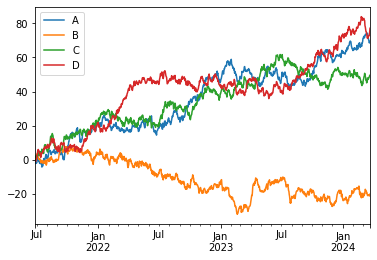

In [103]:
import numpy as np
import pandas as pd

# 1、线形图
df1 = pd.DataFrame(data = np.random.randn(1000,4),
                  index = pd.date_range(start = '27/6/2021',periods=1000),
                  columns=list('ABCD'))
df1.cumsum().plot()

In [104]:
# 2、条形图
df2 = pd.DataFrame(data = np.random.rand(10,4),
                   columns = list('ABCD'))
df2

,A,B,C,D
0,0.680645,0.643952,0.171575,0.810455
1,0.601552,0.423460,0.998453,0.676082
2,0.397628,0.515017,0.314111,0.842519
3,0.733833,0.131711,0.186187,0.854695
4,0.687143,0.191705,0.350857,0.444577
5,0.984425,0.803411,0.350058,0.750763
6,0.695812,0.314765,0.587074,0.234223
7,0.082195,0.012985,0.579663,0.376897
8,0.647974,0.328815,0.036378,0.315900
9,0.088896,0.078965,0.513621,0.097719


<AxesSubplot:>

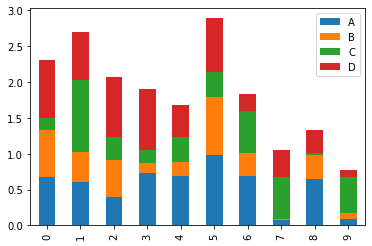

In [107]:
df2.plot.bar(stacked = True) # stacked 是否堆叠

array([<AxesSubplot:ylabel='One'>, <AxesSubplot:ylabel='Two'>],
      dtype=object)

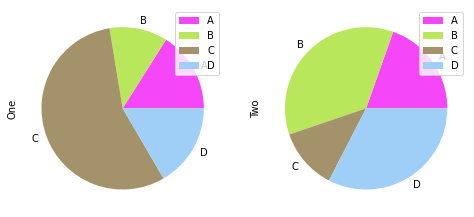

In [116]:
# 3、饼图，百分比，自动计算
df3 = pd.DataFrame(data = np.random.rand(4,2),
                   index = list('ABCD'),
                   columns=['One','Two'])
# subplots两个图，多个图
# figsize 尺寸
df3.plot.pie(subplots = True,figsize = (8,8),colors = np.random.random(size = (4,3)))

<AxesSubplot:xlabel='A', ylabel='B'>

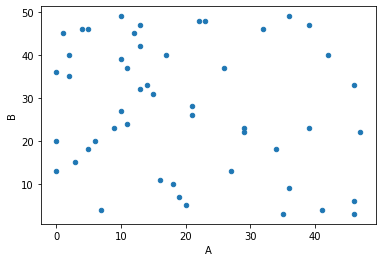

In [122]:
# 4、散点图，横纵坐标，表示：两个属性之间的关系
df4 = pd.DataFrame(np.random.randint(0,50, size = (50,4)), columns=list('ABCD'))
df4.plot.scatter(x='A', y='B') # A和B关系绘制
# # 在一张图中绘制AC散点图，同时绘制BD散点图
# ax = df4.plot.scatter(x='A', y='C', color='DarkBlue', label='Group 1');
# df4.plot.scatter(x='B', y='D', color='DarkGreen', label='Group 2', ax=ax)
# # 气泡图，散点有大小之分
# df4.plot.scatter(x='A',y='B',s = df4['C']*200)


In [123]:
df4['F'] = df4['C'].map(lambda x : x + np.random.randint(-5,5,size =1)[0])
df4

,A,B,C,D,F
0,29,22,15,49,13
1,0,36,13,33,9
2,46,3,4,8,0
3,36,9,26,11,30
4,0,13,9,8,4
5,47,22,49,9,49
6,13,42,9,13,6
7,5,18,45,40,46
8,39,47,19,3,22
9,41,4,11,26,9


<AxesSubplot:xlabel='C', ylabel='F'>

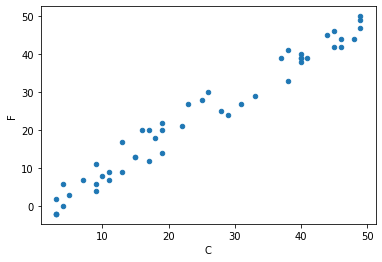

In [124]:
df4.plot.scatter(x = 'C',y = 'F')

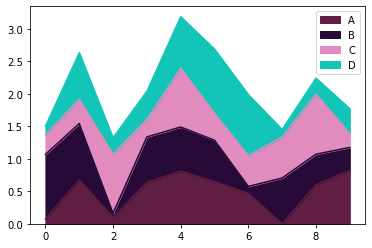

In [130]:
# 5、面积图
df5 = pd.DataFrame(data = np.random.rand(10, 4), 
                   columns=list('ABCD'))
df5.plot.area(stacked = True,color = np.random.rand(4,3));# stacked 是否堆叠

In [132]:
# 颜色：红绿蓝
np.random.rand(4,3) # 4行3列

array([[0.28248212, 0.34948366, 0.44362018],
       [0.43869851, 0.49292967, 0.41762117],
       [0.66927152, 0.25166616, 0.99956279],
       [0.35888532, 0.92789754, 0.25542305]])

In [133]:
df = pd.read_excel('./分数汇总.xlsx')
df.head()

,性别,姓名,男1000米跑,男1000米跑分数,男50米跑,男50米跑分数,男跳远,男跳远分数,男体前屈,男体前屈分数,男引体,男引体分数,男肺活量,男肺活量分数
0,男,郭*森18,5.19,40,9.55,50,210,66,15,80,6,50,7042,100
1,男,苏*飞27,4.12,72,8.60,68,215,70,15,80,11,76,3458,74
2,男,寻*潇13,4.17,70,8.16,72,215,70,14,78,4,30,4336,90
3,男,郭*冉36,4.19,70,8.96,64,205,64,14,78,0,0,4539,95
4,男,王*磊40,0.00,0,8.30,72,230,76,14,78,9,68,6059,100


In [137]:
df['姓名'].str[3:] # 切片

0       18
1       27
2       13
3       36
4       40
        ..
1080     1
1081     2
1082     1
1083    28
1084    19
Name: 姓名, Length: 1085, dtype: object

In [139]:
# 正则表达式 \d表示数字
# .表示任意字符* 表示0个多个
# 正则表达式，不熟练，没关系，
df['姓名'].str.extract(r'.*?(\d+)')

,0
0,18
1,27
2,13
3,36
4,40
...,...
1080,1
1081,2
1082,1
1083,28
